In [2]:
from mybatch import *
from data import *
from results import *
import numpy as np

import seaborn
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqn
from dataset import Dataset, DatasetIndex
import warnings
warnings.filterwarnings("ignore")

In [3]:
def create_dataset(size, data):
    dataset = Dataset(np.arange(size), batch_class=MyBatch, preloaded=(data[0], data[1]))
    dataset.cv_split()
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    return dataset, sess

# linear regression

In [6]:
size = 1000
linear_x, linear_y = generate_linear_data(size=size, error_scale=1)

trues weights and bias:  [ 0.08188448  0.71071491]   [-0.9959928]
mse between y with and without noize:  1.0329183728


In [7]:
dataset, sess = create_dataset(size=size, data = [linear_x, linear_y])

models weights and bias:  [ 0.11052205  0.53659225]   [[-0.966721]]
size of prediction data:  200
model mse:  0.0532757793214


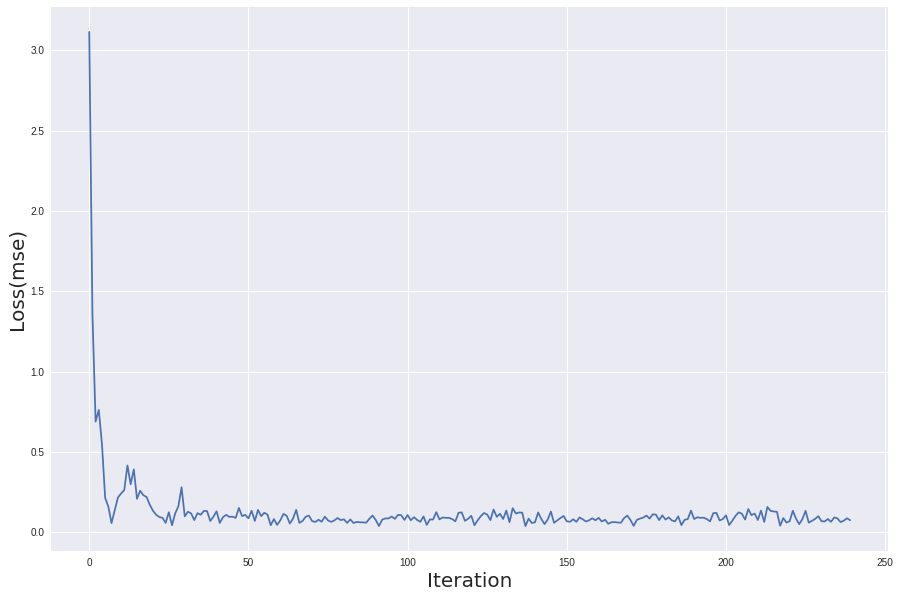

In [8]:
dict_params = {'loss': [], 'w': [], 'b': []}
dataset.train.p\
    .load((linear_x, linear_y))\
    .train_linear_model(sess, dict_params).run(10, n_epochs=3)
predict = []
dataset.test.p\
    .load((linear_x, linear_y))\
    .predict_linear(sess, predict=predict).run(int(size * 0.2),n_epochs=1)

print_info(dict_params, linear_y[dataset.test.indices], predict, 'mse')
plot_loss(dict_params['loss'])

# logistic regression

In [16]:
size = 1000
logistic_x, logistic_y = generate_logistic_data(size, [[1,2],[[15,0],[0,15]]], [[10,17],[[15,0],[0,15]]])

In [17]:
dataset, sess = create_dataset(size, [logistic_x, logistic_y])

models weights and bias:  [ 0.28877294  0.50692636]   [[-0.71059418]]
size of prediction data:  200
model acc:  0.985


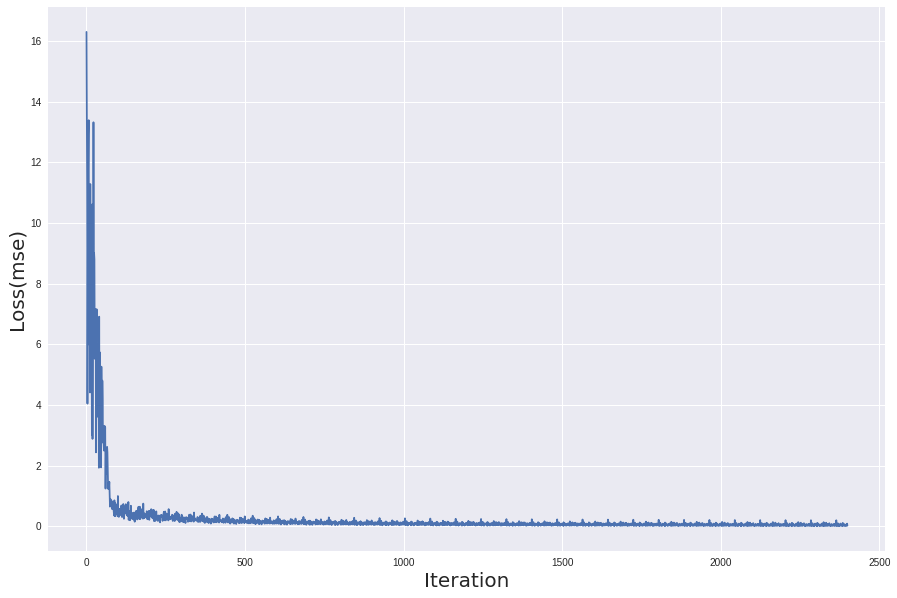

In [18]:
dict_params = {'loss': [], 'w': [], 'b': []}

dataset.train.p\
    .load((logistic_x, logistic_y))\
    .train_logistic_model(sess, dict_params).run(10, n_epochs=30)
predict = []
dataset.test.p\
    .load((logistic_x, logistic_y))\
    .predict_logistic(sess, predict=predict).run(int(size * 0.2),n_epochs=1)
print_info(dict_params, logistic_y[dataset.test.indices], predict, 'acc')
plot_loss(dict_params['loss'])

# poisson regression

In [28]:
size = 1000
poisson_x, poisson_y = generate_poisson_data(np.random.random(2), size)

In [29]:
dataset, sess = create_dataset(size, [poisson_x, poisson_y])

models weights and bias:  [ 0.27780476  0.610964  ]   [[-0.39646006]]
size of prediction data:  200


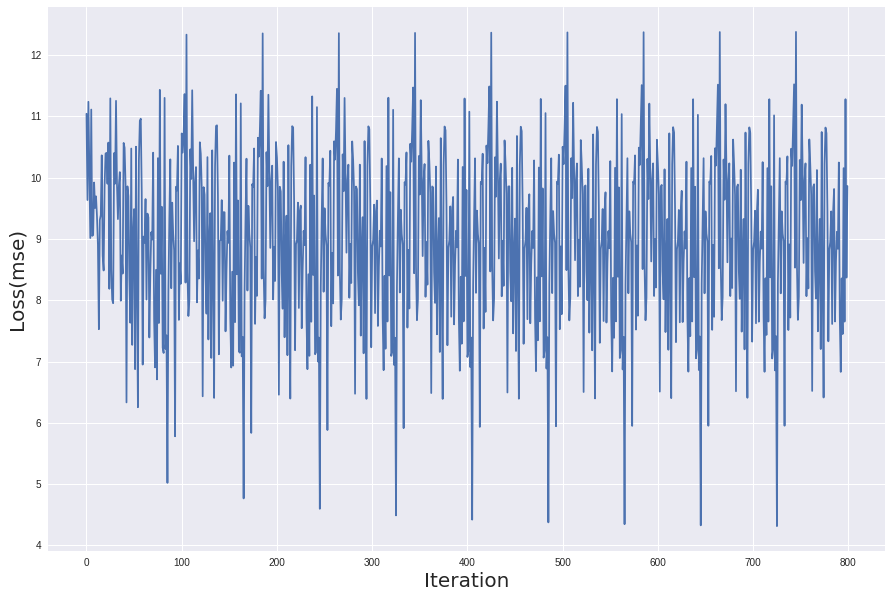

In [30]:
dict_params = {'loss': [], 'w': [], 'b': []}

dataset.train.p\
    .load((poisson_x, poisson_y))\
    .train_poisson_model(sess, dict_params).run(10, n_epochs=10)
predict = []
dataset.test.p\
    .load((poisson_x, poisson_y))\
    .predict_poisson(sess, predict=predict).run(int(size * 0.2),n_epochs=1)
print_info(dict_params, poisson_y[dataset.test.indices], predict, 'accs')
plot_loss(dict_params['loss'])